![title](/media/lnr-ai/christo/github_repos/mcb/img/Screenshot from 2020-03-10 05-52-40.png)

```
From github: git clone https://github.com/ChristoGH/mcb.git
```

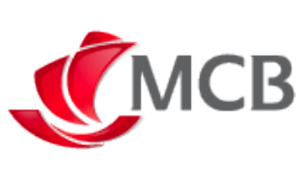

In [1]:
from IPython.display import Image
Image(filename='/media/lnr-ai/christo/github_repos/mcb/img/Screenshot from 2020-03-10 05-52-40.png')

In [2]:
from wand.image import Image as WImage

In [3]:
# sudo mv /etc/ImageMagick-6/policy.xml /etc/ImageMagick-6/policy.xml.off
# img = WImage(filename='/media/lnr-ai/christo/github_repos/mcb/data/Data Scientist Case Study Exercise - Dec 2019.pdf')
# img

### Import required libraries:

In [8]:
import pandas as pd # data frame approach
import numpy as np # numerical calcs
from pandas.tseries.offsets import BMonthEnd # finding the lasts business day of the month
from datetime import date
from datetime import datetime

### Define constants and filenames:

In [9]:
file_path = '/media/lnr-ai/christo/github_repos/mcb/data/'
glossary_fname = 'Glossary.xlsx'
customer_fname = 'customer.csv'
account_fname = 'account.csv'
transaction_fname = 'transaction.csv'

```
account.csv
customer.csv
transaction.csv
Glossary.xlsx
```

#### Define utility functions:

In [66]:
def frac2date(x):
    return datetime(frac2year(x),frac2month(x),1)

def frac2month(x):
    f2m = int((x-np.floor(x))*12)==0
#     if f2m==0:
#         f2m=12
    return 3*f2m+(not f2m)*(int((x-np.floor(x))*12)+3)

def frac2year(x):
    return int(np.floor(x))

def bmonth_end_fn(x):
    offset = BMonthEnd()
    return offset.rollforward(x)

In [11]:
frac2date(x=2015.75)

datetime.datetime(2015, 12, 1, 0, 0)

### Read glossary definitions; store in dataframes:

In [12]:
# glossary_fname = 'Glossary.xlsx'
account_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Accounts')
customer_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Customer')
transaction_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Transactions')

### Load .csv files and rename:

In [13]:
customer_df=pd.read_csv(filepath_or_buffer=file_path+customer_fname)
account_df=pd.read_csv(filepath_or_buffer=file_path+account_fname)
transaction_df=pd.read_csv(filepath_or_buffer=file_path+transaction_fname)

## Look at the Customer file:

### Headings:

In [14]:
list(customer_df)

['CIR',
 'RUN_DATE',
 'MARKET_SEGMENT_DESCRIPTION',
 'RESIDENT_FLAG',
 'GENDER',
 'MARITAL_STATUS_DESCRIPTION',
 'SALARY_AMOUNT',
 'NUMBER_OF_DEPENDANTS',
 'CERTIFICATION_ACHIEVEMENT_DESCRIPTION']

### Have a peek at the contents:

In [15]:
customer_df.head()

,CIR,RUN_DATE,MARKET_SEGMENT_DESCRIPTION,RESIDENT_FLAG,GENDER,MARITAL_STATUS_DESCRIPTION,SALARY_AMOUNT,NUMBER_OF_DEPENDANTS,CERTIFICATION_ACHIEVEMENT_DESCRIPTION
0,8803,9/28/2018,SEGMENT 18-25,Y,FEMALE,SINGLE,0.0,NaN,SECONDARY COMPLETE
1,8803,6/30/2015,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,NaN
2,8803,12/31/2015,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,NaN
3,8803,3/31/2016,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,SECONDARY COMPLETE
4,8803,6/30/2017,SEGMENT 18-25,Y,FEMALE,SINGLE,0.0,NaN,SECONDARY COMPLETE


### Look at the nature of the columns:

In [16]:
customer_df.dtypes

CIR                                        int64
RUN_DATE                                  object
MARKET_SEGMENT_DESCRIPTION                object
RESIDENT_FLAG                             object
GENDER                                    object
MARITAL_STATUS_DESCRIPTION                object
SALARY_AMOUNT                            float64
NUMBER_OF_DEPENDANTS                     float64
CERTIFICATION_ACHIEVEMENT_DESCRIPTION     object
dtype: object

### Look at the CIR column:

#### number of entries:

In [17]:
len(customer_df.CIR)

141169

#### unique clients:

In [18]:
len(set(customer_df.CIR))

8909

### Look at the RUN_DATE column:

In [19]:
customer_df.RUN_DATE

0          9/28/2018
1          6/30/2015
2         12/31/2015
3          3/31/2016
4          6/30/2017
             ...    
141164     3/29/2019
141165     3/29/2019
141166     3/29/2019
141167     3/29/2019
141168     3/29/2019
Name: RUN_DATE, Length: 141169, dtype: object

In [20]:
set(customer_df.RUN_DATE)

{'12/29/2017',
 '12/30/2016',
 '12/31/2015',
 '12/31/2018',
 '3/29/2019',
 '3/30/2018',
 '3/31/2015',
 '3/31/2016',
 '3/31/2017',
 '6/29/2018',
 '6/30/2015',
 '6/30/2016',
 '6/30/2017',
 '9/28/2018',
 '9/29/2017',
 '9/30/2015',
 '9/30/2016'}

#### Convert RUN_DATE to a python date format:

In [21]:
customer_df['RUN_DATE'] = pd.to_datetime(customer_df['RUN_DATE'], infer_datetime_format=True)

In [22]:
customer_df['RUN_DATE']

0        2018-09-28
1        2015-06-30
2        2015-12-31
3        2016-03-31
4        2017-06-30
            ...    
141164   2019-03-29
141165   2019-03-29
141166   2019-03-29
141167   2019-03-29
141168   2019-03-29
Name: RUN_DATE, Length: 141169, dtype: datetime64[ns]

In [24]:
# Look at the number of entries per date:
customer_df['RUN_DATE'].value_counts()

2019-03-29    8893
2018-12-31    8770
2018-09-28    8748
2018-06-29    8672
2018-03-30    8590
2017-12-29    8516
2017-09-29    8424
2017-06-30    8356
2017-03-31    8291
2016-12-30    8218
2016-09-30    8151
2016-06-30    8084
2016-03-31    8016
2015-12-31    7959
2015-09-30    7893
2015-06-30    7835
2015-03-31    7753
Name: RUN_DATE, dtype: int64

In [26]:
# Create a variable containing all run dates:
run_dates=list(set(customer_df.RUN_DATE))

In [27]:
df=customer_df[customer_df.RUN_DATE==run_dates[0]]
df.shape

(7753, 9)

### explore MARKET_SEGMENT_DESCRIPTION:

In [29]:
df['MARKET_SEGMENT_DESCRIPTION'].value_counts()

MASS                  6240
SEGMENT 18-25         1165
MASS AFFLUENT          212
MCB SELECT              47
PRIVATE BANKING         42
UPPER MASS              35
YOUNG PROFESSIONAL      12
Name: MARKET_SEGMENT_DESCRIPTION, dtype: int64

In [30]:
df=customer_df[['CIR','MARKET_SEGMENT_DESCRIPTION','RUN_DATE']].groupby(['CIR','MARKET_SEGMENT_DESCRIPTION']).max()

In [31]:
gf=df.reset_index()

In [32]:
gf['RUN_DATE'].value_counts()

2019-03-29    8893
2018-09-28     150
2015-12-31     148
2015-03-31     129
2016-09-30     123
2017-06-30     111
2016-06-30     109
2018-03-30      85
2016-12-30      82
2017-09-29      81
2017-03-31      77
2016-03-31      75
2015-09-30      73
2017-12-29      68
2015-06-30      63
2018-06-29      52
2018-12-31      46
Name: RUN_DATE, dtype: int64

In [33]:
customer_df.dtypes

CIR                                               int64
RUN_DATE                                 datetime64[ns]
MARKET_SEGMENT_DESCRIPTION                       object
RESIDENT_FLAG                                    object
GENDER                                           object
MARITAL_STATUS_DESCRIPTION                       object
SALARY_AMOUNT                                   float64
NUMBER_OF_DEPENDANTS                            float64
CERTIFICATION_ACHIEVEMENT_DESCRIPTION            object
dtype: object

In [35]:
customer_df.MARKET_SEGMENT_DESCRIPTION.value_counts()

MASS                        111768
SEGMENT 18-25                19949
MASS AFFLUENT                 7047
PRIVATE BANKING                960
MCB SELECT                     854
INTERNATIONAL                  417
MCB SELECT INTERNATIONAL       127
UPPER MASS                      35
YOUNG PROFESSIONAL              12
Name: MARKET_SEGMENT_DESCRIPTION, dtype: int64

In [37]:
len(gf.CIR)-len(set(gf.CIR))

1456

### Explore RESIDENT_FLAG

In [38]:
customer_df['RESIDENT_FLAG'].value_counts()

Y    137150
N      4019
Name: RESIDENT_FLAG, dtype: int64

### GENDER:

In [39]:
customer_df['GENDER'].value_counts()

MALE          57856
FEMALE        56504
MALE          13397
FEMALE        12950
Name: GENDER, dtype: int64

In [40]:
customer_df['GENDER'].str.strip().value_counts()

MALE      71253
FEMALE    69454
Name: GENDER, dtype: int64

In [41]:
customer_df['GENDER']=customer_df['GENDER'].str.strip()

In [42]:
customer_df['GENDER'].value_counts()

MALE      71253
FEMALE    69454
Name: GENDER, dtype: int64

#### MARITAL_STATUS_DESCRIPTION

In [43]:
customer_df['MARITAL_STATUS_DESCRIPTION'].value_counts()

MARRIED COM         67931
SINGLE              53777
WIDOWED              4008
UNMARRIED COUPLE     3092
DIVORCED             2898
MARRIED SEP          1937
Name: MARITAL_STATUS_DESCRIPTION, dtype: int64

### Explore account detail:

In [45]:
account_df=pd.read_csv(filepath_or_buffer=file_path+account_fname)

In [53]:
run_dates

[Timestamp('2015-03-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2018-06-29 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 Timestamp('2018-09-28 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2015-09-30 00:00:00'),
 Timestamp('2019-03-29 00:00:00'),
 Timestamp('2016-12-30 00:00:00'),
 Timestamp('2017-12-29 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2018-03-30 00:00:00'),
 Timestamp('2017-09-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-03-31 00:00:00')]

In [46]:
list(account_df)

['Unnamed: 0',
 'RUN_DATE',
 'Customer_number',
 'loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']

In [71]:
account_df.pop('Unnamed: 0')
account_df.rename(columns={'Customer_number':'CIR'}, inplace = True)

In [55]:
account_df['RUN_DATE'] = pd.to_datetime(account_df['RUN_DATE'], infer_datetime_format=True)

In [58]:
set(run_dates) - set(account_df['RUN_DATE'])

set()

In [49]:
a_df=account_df[account_df.RUN_DATE==run_dates[0]]
a_df.shape

(8543, 8)

In [50]:
list(a_df)

['Unnamed: 0',
 'RUN_DATE',
 'Customer_number',
 'loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']

In [51]:
len(a_df.Customer_number)-len(set(a_df.Customer_number))

0

In [79]:
account_df.loan_general_application.value_counts()

0.0    425
9.0     31
2.0      9
6.0      8
1.0      5
8.0      5
5.0      3
4.0      3
7.0      2
3.0      2
Name: loan_general_application, dtype: int64

### Explore transaction detail:

#### Read the transaction file:

In [67]:
transaction_df=pd.read_csv(filepath_or_buffer=file_path+transaction_fname)

In [68]:
list(transaction_df)

['CIR',
 'RUN_Date',
 'sum.amt_Bank Draft_N',
 'sum.amt_Bank Fee_N',
 'sum.amt_Bundle Fee_N',
 'sum.amt_Cash Depo_N',
 'sum.amt_Cash Out_N',
 'sum.amt_Cheque_N',
 'sum.amt_Contra Entry_N',
 'sum.amt_Cr Intr_N',
 'sum.amt_Db Intr_N',
 'sum.amt_Direct Db_N',
 'sum.amt_FD Maturity_N',
 'sum.amt_FD Pre Closure_N',
 'sum.amt_FD Set Up_N',
 'sum.amt_Failed Direct Db_N',
 'sum.amt_Ignore_N',
 'sum.amt_Income_N',
 'sum.amt_Insurance_N',
 'sum.amt_Intr_N',
 'sum.amt_Inward Trnf_N',
 'sum.amt_Loan Repay_N',
 'sum.amt_Locker Depo_N',
 'sum.amt_Merchant Stlmt_N',
 'sum.amt_MoneyGram_N',
 'sum.amt_Others_N',
 'sum.amt_Out. Trnf_N',
 'sum.amt_Past Due_N',
 'sum.amt_Payment_N',
 'sum.amt_Refill_N',
 'sum.amt_Reject_N',
 'sum.amt_Securities_N',
 'sum.amt_Securities Purchase_N',
 'sum.amt_Securities Sale_N',
 'sum.amt_Stdin Order_N',
 'sum.amt_Trnf_N',
 'sum.amt_Unpaid Fee_N',
 'sum.amt_NA_N',
 'sum.amt_NA_P']

In [72]:
# set(customer_df.RUN_DATE)

In [73]:
transaction_df['RUN_DATE_']=transaction_df.RUN_Date.apply(frac2date)

In [74]:
set(transaction_df['RUN_DATE_'])

{Timestamp('2015-03-01 00:00:00'),
 Timestamp('2015-06-01 00:00:00'),
 Timestamp('2015-09-01 00:00:00'),
 Timestamp('2015-12-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2016-06-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2017-03-01 00:00:00'),
 Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00')}

In [75]:
transaction_df['RUN_DATE']=transaction_df['RUN_DATE_'].apply(bmonth_end_fn)

In [76]:
set(transaction_df['RUN_DATE'])-set(customer_df.RUN_DATE)

set()

In [ ]:
transaction_df[transaction_df.RUN_Date==run_dates[0]]

In [ ]:
transaction_df['RUN_Date']

In [ ]:
def frac2month(x):
    return int((x-np.floor(x))*12)

def frac2year(x):
    return int(np.floor(x))

In [ ]:
int((transaction_df.RUN_Date[2]-np.floor(transaction_df.RUN_Date[2]))*12)

In [ ]:
run_date_dict={}
run_date_dict['2015.00']=datetime(2015,3,31)
run_date_dict['2015.25']=datetime(2015,6,30)
run_date_dict['2015.50']=datetime(2015,9,30)
run_date_dict['2015.75']=datetime(2015,6,30)

In [ ]:
run_date_dict

In [ ]:


d=date.today()

offset = BMonthEnd()

#Last day of current month
offset.rollforward(d)

In [ ]:
temp_dates=list(set(gf['RUN_DATE']))

In [ ]:
temp_dates[0]

In [ ]:
for d in temp_dates:
    offset = BMonthEnd()
    #Last day of current month
    print(offset.rollforward(d))

In [ ]:
set(gf['RUN_DATE'])

In [ ]:
transaction_df['RUN_Date']

###  Do a review of all data:

In [78]:
transaction_df[transaction_df.RUN_DATE==run_dates[0]]

,CIR,RUN_Date,sum.amt_Bank Draft_N,sum.amt_Bank Fee_N,sum.amt_Bundle Fee_N,sum.amt_Cash Depo_N,sum.amt_Cash Out_N,sum.amt_Cheque_N,sum.amt_Contra Entry_N,sum.amt_Cr Intr_N,...,sum.amt_Securities_N,sum.amt_Securities Purchase_N,sum.amt_Securities Sale_N,sum.amt_Stdin Order_N,sum.amt_Trnf_N,sum.amt_Unpaid Fee_N,sum.amt_NA_N,sum.amt_NA_P,RUN_DATE_,RUN_DATE
0,6211,2015.0,0.0,-817.0,0.0,0.0,0.0,-1610135.13,0.0,0.0,...,0.0,0.0,0.0,-109917.00,0.0,0.0,-150000.00,245798.00,2015-03-01,2015-03-31
16,7623,2015.0,0.0,-67.5,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,2015-03-01,2015-03-31
32,1934,2015.0,0.0,-627.5,0.0,0.0,0.0,-251086.44,0.0,0.0,...,0.0,0.0,0.0,-28495.00,0.0,0.0,-130520.08,846721.00,2015-03-01,2015-03-31
48,3937,2015.0,0.0,-37.5,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,2015-03-01,2015-03-31
64,4547,2015.0,0.0,-253.5,0.0,0.0,0.0,-33000.00,0.0,0.0,...,0.0,0.0,0.0,-44935.77,0.0,0.0,0.00,80697.00,2015-03-01,2015-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99891,3748,2015.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,2015-03-01,2015-03-31
99902,3749,2015.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,-799.98,0.00,2015-03-01,2015-03-31
99914,3750,2015.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,13501.84,2015-03-01,2015-03-31
99930,3751,2015.0,0.0,0.0,0.0,0.0,-23000.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,-8000.00,0.00,2015-03-01,2015-03-31


In [83]:
account_df[account_df.loan_car_application==0]

,Unnamed: 0,RUN_DATE,CIR,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application
244,26087,2015-03-31,245,0.0,0.0,0.0,9.0,0.0
396,41456,2015-03-31,397,0.0,0.0,0.0,0.0,9.0
480,50966,2015-03-31,481,0.0,0.0,0.0,0.0,5.0
546,59182,2015-03-31,547,0.0,0.0,0.0,0.0,5.0
628,67681,2015-03-31,629,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...
148637,15325574,2019-03-29,7369,0.0,0.0,0.0,0.0,1.0
148851,15347557,2019-03-29,7590,0.0,0.0,0.0,0.0,1.0
149260,15388605,2019-03-29,8021,0.0,0.0,0.0,0.0,1.0
149444,15407764,2019-03-29,8220,0.0,0.0,0.0,0.0,1.0


In [91]:
CIR=7369
account_df[account_df.CIR==CIR]

,Unnamed: 0,RUN_DATE,CIR,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application
7368,758971,2015-03-31,7369,NaN,NaN,NaN,NaN,NaN
15927,1637719,2015-06-30,7369,NaN,NaN,NaN,NaN,NaN
24509,2519297,2015-09-30,7369,NaN,NaN,NaN,NaN,NaN
33104,3403834,2015-12-31,7369,NaN,NaN,NaN,NaN,NaN
41779,4297111,2016-03-31,7369,NaN,NaN,NaN,NaN,NaN
50452,5189885,2016-06-30,7369,NaN,NaN,NaN,NaN,NaN
59133,6086727,2016-09-30,7369,NaN,NaN,NaN,NaN,NaN
67862,6989016,2016-12-30,7369,NaN,NaN,NaN,NaN,NaN
76645,7897454,2017-03-31,7369,NaN,NaN,NaN,NaN,NaN
85471,8810574,2017-06-30,7369,NaN,NaN,NaN,NaN,NaN


In [92]:
list(transaction_df)


['CIR',
 'RUN_Date',
 'sum.amt_Bank Draft_N',
 'sum.amt_Bank Fee_N',
 'sum.amt_Bundle Fee_N',
 'sum.amt_Cash Depo_N',
 'sum.amt_Cash Out_N',
 'sum.amt_Cheque_N',
 'sum.amt_Contra Entry_N',
 'sum.amt_Cr Intr_N',
 'sum.amt_Db Intr_N',
 'sum.amt_Direct Db_N',
 'sum.amt_FD Maturity_N',
 'sum.amt_FD Pre Closure_N',
 'sum.amt_FD Set Up_N',
 'sum.amt_Failed Direct Db_N',
 'sum.amt_Ignore_N',
 'sum.amt_Income_N',
 'sum.amt_Insurance_N',
 'sum.amt_Intr_N',
 'sum.amt_Inward Trnf_N',
 'sum.amt_Loan Repay_N',
 'sum.amt_Locker Depo_N',
 'sum.amt_Merchant Stlmt_N',
 'sum.amt_MoneyGram_N',
 'sum.amt_Others_N',
 'sum.amt_Out. Trnf_N',
 'sum.amt_Past Due_N',
 'sum.amt_Payment_N',
 'sum.amt_Refill_N',
 'sum.amt_Reject_N',
 'sum.amt_Securities_N',
 'sum.amt_Securities Purchase_N',
 'sum.amt_Securities Sale_N',
 'sum.amt_Stdin Order_N',
 'sum.amt_Trnf_N',
 'sum.amt_Unpaid Fee_N',
 'sum.amt_NA_N',
 'sum.amt_NA_P',
 'RUN_DATE_',
 'RUN_DATE']

In [93]:
transaction_df[transaction_df.CIR==CIR]

,CIR,RUN_Date,sum.amt_Bank Draft_N,sum.amt_Bank Fee_N,sum.amt_Bundle Fee_N,sum.amt_Cash Depo_N,sum.amt_Cash Out_N,sum.amt_Cheque_N,sum.amt_Contra Entry_N,sum.amt_Cr Intr_N,...,sum.amt_Securities_N,sum.amt_Securities Purchase_N,sum.amt_Securities Sale_N,sum.amt_Stdin Order_N,sum.amt_Trnf_N,sum.amt_Unpaid Fee_N,sum.amt_NA_N,sum.amt_NA_P,RUN_DATE_,RUN_DATE
4090,7369,2015.00,0.0,0.0,0.0,0.0,-20500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-03-01,2015-03-31
4091,7369,2015.25,0.0,-80.0,0.0,0.0,-82000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-06-01,2015-06-30
4092,7369,2015.50,0.0,0.0,0.0,0.0,-160500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-01,2015-09-30
4093,7369,2015.75,0.0,-70.0,0.0,0.0,-105500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-01,2015-12-31
4094,7369,2016.00,0.0,0.0,0.0,0.0,-20500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-01,2016-03-31
4095,7369,2016.25,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-06-01,2016-06-30
4096,7369,2016.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-09-01,2016-09-30
4097,7369,2016.75,0.0,0.0,0.0,0.0,-9000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,2016-12-30
4098,7369,2017.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-03-01,2017-03-31
4099,7369,2017.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-06-01,2017-06-30


In [89]:
transaction_df[transaction_df.CIR==245][['sum.amt_Loan Repay_N', 'sum.amt_Cr Intr_N',
 'sum.amt_Db Intr_N', 'sum.amt_Direct Db_N','RUN_DATE']]

,sum.amt_Loan Repay_N,sum.amt_Cr Intr_N,sum.amt_Db Intr_N,sum.amt_Direct Db_N,RUN_DATE
68605,-196589.61,0.0,-10035.91,-7686.0,2015-03-31
68606,-144173.06,0.0,-3159.13,-6000.0,2015-06-30
68607,-107847.54,0.0,-1732.92,-4500.0,2015-09-30
68608,-106092.60,0.0,-1495.49,-4500.0,2015-12-31
68609,-105215.13,0.0,-0.31,-4500.0,2016-03-31
68610,-105215.13,0.0,0.00,-3000.0,2016-06-30
68611,-102440.69,0.0,-494.04,-6000.0,2016-09-30
68612,-101053.47,0.0,-298.71,-4500.0,2016-12-30
68613,-101053.47,0.0,-30.41,-4500.0,2017-03-31
68614,-101053.47,0.0,0.00,-4500.0,2017-06-30
